In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv("C:/Users/Admin/Desktop/20212/AppliedStatisticsProject20212/dataset/data_train.csv")
data_test = pd.read_csv("C:/Users/Admin/Desktop/20212/AppliedStatisticsProject20212/dataset/data_test.csv")

In [3]:
data_train = data_train.set_index(['user_id', 'product_id'])
data_test = data_test.set_index(['user_id', 'product_id'])

In [4]:
from sklearn.model_selection import train_test_split
X = data_train.drop('reordered', axis=1)
y = data_train.reordered
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y,
                                                 test_size = 0.3, random_state = 42)

In [5]:
# #Using SMOTE to handle imbalanced classes
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(sampling_strategy='minority', random_state=42)

# # Fit the model to generate the data.
# oversampled_trainX, oversampled_trainY = sm.fit_resample(X_train, y_train)
# oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
# oversampled_train.head()


,reordered,uxp_total_bought,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total_purchases,p_reorder_ratio
0,0.0,4,0.250000,26,0.645390,19544,0.414552
1,0.0,1,0.040000,33,0.531429,655,0.491603
2,0.0,1,0.500000,7,0.377143,75886,0.771064
3,0.0,4,1.000000,4,0.339623,676,0.505917
4,0.0,1,0.142857,28,0.355731,2429,0.607657


In [16]:
import xgboost as xgb
from sklearn.metrics import f1_score

def xgb_f1(y, t, threshold=0.5):
    print(t)
    t = t.get_label()
    y_bin = (y > threshold).astype(int) 
    return 'f1',f1_score(t,y_bin)

xg_cl = xgb.XGBClassifier(silent=False,
                      scale_pos_weight=8,
                      learning_rate=0.01,  
                      colsample_bytree = 1,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=500, 
                      reg_alpha = 0.1,
                      max_depth=4, 
                      gamma=2,
                      n_jobs=4,               
                      seed=42)
eval_set = [(X_train, y_train), (X_val, y_val)]

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train, eval_metric=["auc", "error"],eval_set=eval_set, verbose=True)


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[20:39:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.80699	validation_0-error:0.20972	validation_1-auc:0.80669	validation_1-error:0.20947
[1]	validation_0-auc:0.80820	validation_0-error:0.20972	validation_1-auc:0.80788	validation_1-error:0.20947
[2]	validation_0-auc:0.80821	validation_0-error:0.20972	validation_1-auc:0.80788	validation_1-error:0.20947
[3]	validation_0-auc:0.80811	validation_0-error:0.20972	validation_1-auc:0.80785	validation_1-error:0.20947
[4]	validation_0-auc:0.80819	validation_0-error:0.20972	validation_1-auc:0.80793	validation_1-error:0.20947
[5]	validation_0-auc:0.80857	validation_0-err

[72]	validation_0-auc:0.81494	validation_0-error:0.23046	validation_1-auc:0.81467	validation_1-error:0.23026
[73]	validation_0-auc:0.81498	validation_0-error:0.23045	validation_1-auc:0.81471	validation_1-error:0.23026
[74]	validation_0-auc:0.81499	validation_0-error:0.23046	validation_1-auc:0.81472	validation_1-error:0.23026
[75]	validation_0-auc:0.81504	validation_0-error:0.23046	validation_1-auc:0.81477	validation_1-error:0.23026
[76]	validation_0-auc:0.81507	validation_0-error:0.23046	validation_1-auc:0.81480	validation_1-error:0.23026
[77]	validation_0-auc:0.81510	validation_0-error:0.23045	validation_1-auc:0.81482	validation_1-error:0.23025
[78]	validation_0-auc:0.81512	validation_0-error:0.23041	validation_1-auc:0.81485	validation_1-error:0.23022
[79]	validation_0-auc:0.81516	validation_0-error:0.23045	validation_1-auc:0.81489	validation_1-error:0.23025
[80]	validation_0-auc:0.81518	validation_0-error:0.23045	validation_1-auc:0.81491	validation_1-error:0.23025
[81]	validation_0-a

[147]	validation_0-auc:0.81650	validation_0-error:0.22778	validation_1-auc:0.81621	validation_1-error:0.22753
[148]	validation_0-auc:0.81652	validation_0-error:0.22749	validation_1-auc:0.81623	validation_1-error:0.22723
[149]	validation_0-auc:0.81653	validation_0-error:0.22778	validation_1-auc:0.81624	validation_1-error:0.22753
[150]	validation_0-auc:0.81655	validation_0-error:0.22746	validation_1-auc:0.81626	validation_1-error:0.22720
[151]	validation_0-auc:0.81656	validation_0-error:0.22746	validation_1-auc:0.81627	validation_1-error:0.22720
[152]	validation_0-auc:0.81658	validation_0-error:0.22763	validation_1-auc:0.81629	validation_1-error:0.22736
[153]	validation_0-auc:0.81660	validation_0-error:0.22763	validation_1-auc:0.81631	validation_1-error:0.22737
[154]	validation_0-auc:0.81663	validation_0-error:0.22753	validation_1-auc:0.81634	validation_1-error:0.22727
[155]	validation_0-auc:0.81665	validation_0-error:0.22768	validation_1-auc:0.81636	validation_1-error:0.22741
[156]	vali

[222]	validation_0-auc:0.81779	validation_0-error:0.22920	validation_1-auc:0.81746	validation_1-error:0.22888
[223]	validation_0-auc:0.81780	validation_0-error:0.22922	validation_1-auc:0.81747	validation_1-error:0.22889
[224]	validation_0-auc:0.81782	validation_0-error:0.22899	validation_1-auc:0.81749	validation_1-error:0.22866
[225]	validation_0-auc:0.81783	validation_0-error:0.22921	validation_1-auc:0.81749	validation_1-error:0.22886
[226]	validation_0-auc:0.81784	validation_0-error:0.22930	validation_1-auc:0.81750	validation_1-error:0.22894
[227]	validation_0-auc:0.81786	validation_0-error:0.22924	validation_1-auc:0.81752	validation_1-error:0.22890
[228]	validation_0-auc:0.81786	validation_0-error:0.22908	validation_1-auc:0.81753	validation_1-error:0.22874
[229]	validation_0-auc:0.81788	validation_0-error:0.22895	validation_1-auc:0.81754	validation_1-error:0.22862
[230]	validation_0-auc:0.81789	validation_0-error:0.22896	validation_1-auc:0.81755	validation_1-error:0.22863
[231]	vali

[297]	validation_0-auc:0.81895	validation_0-error:0.22936	validation_1-auc:0.81855	validation_1-error:0.22901
[298]	validation_0-auc:0.81897	validation_0-error:0.22934	validation_1-auc:0.81857	validation_1-error:0.22899
[299]	validation_0-auc:0.81899	validation_0-error:0.22928	validation_1-auc:0.81859	validation_1-error:0.22893
[300]	validation_0-auc:0.81900	validation_0-error:0.22929	validation_1-auc:0.81860	validation_1-error:0.22895
[301]	validation_0-auc:0.81902	validation_0-error:0.22929	validation_1-auc:0.81862	validation_1-error:0.22896
[302]	validation_0-auc:0.81904	validation_0-error:0.22935	validation_1-auc:0.81864	validation_1-error:0.22901
[303]	validation_0-auc:0.81905	validation_0-error:0.22932	validation_1-auc:0.81865	validation_1-error:0.22899
[304]	validation_0-auc:0.81907	validation_0-error:0.22936	validation_1-auc:0.81867	validation_1-error:0.22904
[305]	validation_0-auc:0.81908	validation_0-error:0.22930	validation_1-auc:0.81868	validation_1-error:0.22898
[306]	vali

[372]	validation_0-auc:0.81983	validation_0-error:0.22978	validation_1-auc:0.81938	validation_1-error:0.22944
[373]	validation_0-auc:0.81984	validation_0-error:0.22975	validation_1-auc:0.81940	validation_1-error:0.22941
[374]	validation_0-auc:0.81985	validation_0-error:0.22975	validation_1-auc:0.81940	validation_1-error:0.22942
[375]	validation_0-auc:0.81986	validation_0-error:0.22974	validation_1-auc:0.81941	validation_1-error:0.22942
[376]	validation_0-auc:0.81987	validation_0-error:0.22973	validation_1-auc:0.81942	validation_1-error:0.22940
[377]	validation_0-auc:0.81988	validation_0-error:0.22971	validation_1-auc:0.81943	validation_1-error:0.22939
[378]	validation_0-auc:0.81989	validation_0-error:0.22972	validation_1-auc:0.81944	validation_1-error:0.22940
[379]	validation_0-auc:0.81990	validation_0-error:0.22972	validation_1-auc:0.81945	validation_1-error:0.22939
[380]	validation_0-auc:0.81991	validation_0-error:0.22970	validation_1-auc:0.81946	validation_1-error:0.22937
[381]	vali

[447]	validation_0-auc:0.82048	validation_0-error:0.22963	validation_1-auc:0.81998	validation_1-error:0.22930
[448]	validation_0-auc:0.82048	validation_0-error:0.22962	validation_1-auc:0.81999	validation_1-error:0.22930
[449]	validation_0-auc:0.82049	validation_0-error:0.22966	validation_1-auc:0.81999	validation_1-error:0.22933
[450]	validation_0-auc:0.82050	validation_0-error:0.22966	validation_1-auc:0.82000	validation_1-error:0.22932
[451]	validation_0-auc:0.82051	validation_0-error:0.22965	validation_1-auc:0.82001	validation_1-error:0.22933
[452]	validation_0-auc:0.82051	validation_0-error:0.22966	validation_1-auc:0.82002	validation_1-error:0.22933
[453]	validation_0-auc:0.82052	validation_0-error:0.22968	validation_1-auc:0.82002	validation_1-error:0.22935
[454]	validation_0-auc:0.82053	validation_0-error:0.22970	validation_1-auc:0.82003	validation_1-error:0.22938
[455]	validation_0-auc:0.82053	validation_0-error:0.22970	validation_1-auc:0.82003	validation_1-error:0.22938
[456]	vali

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=4, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0.1, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

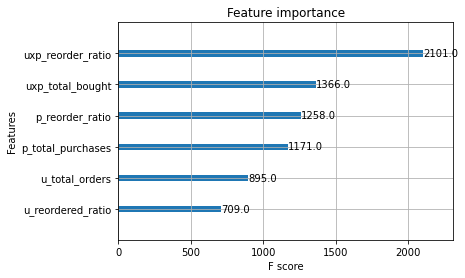

In [13]:
from xgboost import plot_importance
# plot feature importance
plot_importance(xg_cl)


In [14]:
from sklearn.metrics import classification_report
predictions = xg_cl.predict(X_val)
print("Test Dataset")
print(classification_report(y_val, predictions))


predictions_train = xg_cl.predict(X_train)
print("Train Dataset")
print(classification_report(y_train, predictions_train))

Test Dataset
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89   2293752
         1.0       0.30      0.62      0.40    248647

    accuracy                           0.82   2542399
   macro avg       0.62      0.73      0.65   2542399
weighted avg       0.89      0.82      0.84   2542399

Train Dataset
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89   5352085
         1.0       0.30      0.62      0.40    580177

    accuracy                           0.82   5932262
   macro avg       0.62      0.73      0.65   5932262
weighted avg       0.89      0.82      0.84   5932262



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.84040777 0.15959223]
 [0.38184655 0.61815345]]


<Figure size 864x864 with 0 Axes>

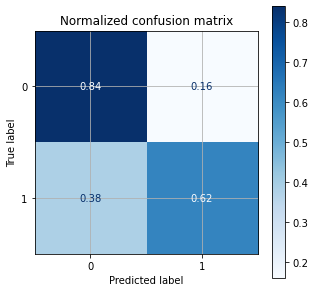

In [15]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
# Plot normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(12,12))
disp = plot_confusion_matrix(xg_cl, X_val, y_val,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize="true")
disp.ax_.set_title("Normalized confusion matrix")

print("Normalized confusion matrix")
print(disp.confusion_matrix)
plt.grid(b=None)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()